### Scope of the project
#### The use case aims to provide hands-on application and understanding of:

1) Data Preprocessing and Exploratory Data Analysis for the data set.

2) Train Tree-Based Models and experiment with hyper-parameters.

3) Apply the trained model for testing data and making predictions.

In [1]:
#  Loading the dataset from sklearn datasets and understanding the data
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True, as_frame=True)
print(X.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

There are 0 missing values
Count of Malignant tumors 212
Count of Benign tumors 357


C:\Users\singhat\.conda\envs\nvh_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


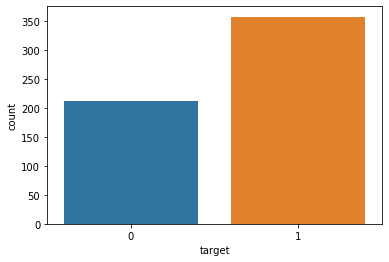

In [6]:
# Checking for missing Values/Null Values and display a count plot for the target variable
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(f'There are {pd.concat([X,y], axis=1).isnull().sum().sum()} missing values')
print(f'Count of Malignant tumors {y.value_counts()[0]}')
print(f'Count of Benign tumors {y.value_counts()[1]}')
ax = sns.countplot(y, label='Count')  
plt.show()

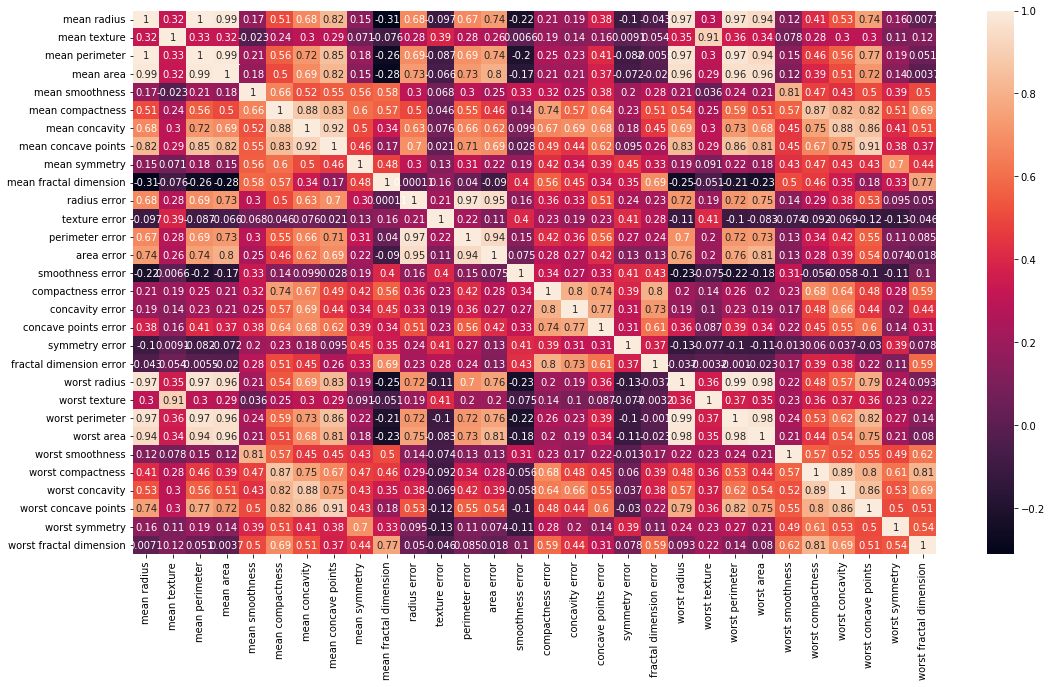

In [7]:
# Data Preparation
# Using the heatmap method to display correlation values from the corr() function of the pandas data frame
plt.figure(figsize=(18,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [8]:
# Remove highly correlated values
drop_list = ['mean perimeter','mean radius','mean compactness','mean concave points','radius error','perimeter error','compactness error','concave points error','worst radius','worst perimeter','worst compactness','worst concave points','worst texture','worst area']
X = X.drop(drop_list, axis=1)

In [9]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
print(f'The shape of Train data is {X_train.shape}')
print(f'The shape of Test data is {X_test.shape}')

The shape of Train data is (455, 16)
The shape of Test data is (114, 16)


In [11]:
# Implementation of Decision Tree Algorithm
# For classification and regression, Decision Trees (DTs) for healthcare analysis are a non-parametric supervised learning method
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [12]:
# Fitting the algorithm
tree_clf.fit(X_train, y_train)
y_test_pred = tree_clf.predict(X_test)

In [13]:
# metrics to evaluate the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print(f'The accuracy of the model is: {accuracy_score(y_test,y_test_pred)*100:0.2f}')
print('confusion matrix')
print(f'{confusion_matrix(y_test, y_test_pred)}')

The accuracy of the model is: 95.61
confusion matrix
[[40  3]
 [ 2 69]]


In [14]:
# Implementation of Random Forest Algorithm
# A random forest is a meta estimator that employs averaging to increase predicted accuracy and control over-fitting by fitting several decision tree classifiers
# Random Forest = Decision Trees + Bagging + Feature sampling
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=32)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
print(f'The accuracy of the model on the train data: {accuracy_score(y_train, y_train_pred)*100:0.2f}')
print(f'The accuracy of the model on the test data: {accuracy_score(y_test, y_test_pred)*100:0.2f}')
print('confusion matrix')
print(f'{confusion_matrix(y_test, y_test_pred)}')

The accuracy of the model on the train data: 100.00
The accuracy of the model on the test data: 97.37
confusion matrix
[[41  2]
 [ 1 70]]


In [15]:
# Hyper parameter-tuned Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=32, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
print(f'The accuracy of the model on the train data: {accuracy_score(y_train, y_train_pred)*100:0.2f}')
print(f'The accuracy of the model on the test data: {accuracy_score(y_test, y_test_pred)*100:0.2f}')
print('confusion matrix')
print(f'{confusion_matrix(y_test, y_test_pred)}')

The accuracy of the model on the train data: 98.46
The accuracy of the model on the test data: 96.49
confusion matrix
[[41  2]
 [ 2 69]]
